<a href="https://colab.research.google.com/github/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/blob/main/C%C3%B3digo_2_90_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Entrenamiento%2090.csv')

In [ ]:
print(df)

        v    RH    u  N     PA     CW
0    14.5  68.6  0.7  2  884.0  0.042
1    20.9  48.6  0.6  0  883.4  0.000
2    18.4  54.0  0.6  0  887.1  0.028
3    14.8  41.4  0.7  8  890.0  0.014
4     6.1  96.4  1.0  7  888.7  0.028
..    ...   ...  ... ..    ...    ...
165   9.6  65.7  0.7  0  891.0  0.083
166  15.2  48.9  3.6  8  886.2  0.056
167  14.9  17.6  0.9  0  887.8  0.000
168  16.3  66.2  0.9  8  884.4  0.028
169  17.0  38.4  1.3  0  888.1  0.000

[170 rows x 6 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02 4.200e-02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02 0.000e+00]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02 2.800e-02]
 ...
 [1.490e+01 1.760e+01 9.000e-01 0.000e+00 8.878e+02 0.000e+00]
 [1.630e+01 6.620e+01 9.000e-01 8.000e+00 8.844e+02 2.800e-02]
 [1.700e+01 3.840e+01 1.300e+00 0.000e+00 8.881e+02 0.000e+00]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,0:5]
Y=dataset[:,5]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos90_10.csv", entrenamientodedatos, delimiter=",")

[[1.450e+01 6.860e+01 7.000e-01 2.000e+00 8.840e+02]
 [2.090e+01 4.860e+01 6.000e-01 0.000e+00 8.834e+02]
 [1.840e+01 5.400e+01 6.000e-01 0.000e+00 8.871e+02]
 [1.480e+01 4.140e+01 7.000e-01 8.000e+00 8.900e+02]
 [6.100e+00 9.640e+01 1.000e+00 7.000e+00 8.887e+02]
 [1.730e+01 6.300e+01 9.000e-01 0.000e+00 8.852e+02]
 [1.670e+01 4.390e+01 7.000e-01 0.000e+00 8.888e+02]
 [1.900e+01 4.540e+01 8.000e-01 0.000e+00 8.841e+02]
 [1.740e+01 2.760e+01 1.000e+00 0.000e+00 8.879e+02]
 [7.200e+00 7.940e+01 1.500e+00 2.000e+00 8.900e+02]
 [7.100e+00 8.610e+01 1.300e+00 8.000e+00 8.882e+02]
 [1.520e+01 6.450e+01 9.000e-01 2.000e+00 8.850e+02]
 [1.430e+01 6.190e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.260e+01 7.950e+01 9.000e-01 2.000e+00 8.864e+02]
 [1.670e+01 6.650e+01 9.000e-01 0.000e+00 8.859e+02]
 [1.490e+01 3.460e+01 8.000e-01 6.000e+00 8.874e+02]
 [6.600e+00 8.180e+01 1.400e+00 0.000e+00 8.926e+02]
 [1.630e+01 5.780e+01 6.000e-01 0.000e+00 8.864e+02]
 [1.230e+01 3.860e+01 1.200e+00 2.000e+00 8.90

In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos90_10.csv", testeodedatos, delimiter=",")

[0.042 0.    0.028 0.014 0.028 0.056 0.    0.042 0.056 0.222 0.111 0.028
 0.    0.222 0.028 0.    0.333 0.056 0.    0.111 0.222 0.042 0.167 0.
 0.125 0.    0.056 0.028 0.    0.    0.056 0.125 0.    0.056 0.    0.028
 0.083 0.    0.014 0.028 0.167 0.028 0.    0.    0.014 0.178 0.    0.014
 0.    0.028 0.083 0.056 0.417 0.167 0.083 0.028 0.    0.167 0.    0.
 0.167 0.    0.056 0.    0.    0.111 0.083 0.    0.167 0.222 0.042 0.056
 0.056 0.278 0.028 0.014 0.056 0.    0.    0.    0.    0.    0.042 0.022
 0.056 0.    0.    0.125 0.    0.153 0.056 0.056 0.    0.    0.    0.
 0.042 0.    0.014 0.083 0.056 0.278 0.222 0.    0.028 0.056 0.056 0.
 0.    0.028 0.111 0.    0.    0.    0.    0.028 0.167 0.222 0.25  0.014
 0.014 0.222 0.    0.    0.    0.    0.056 0.    0.042 0.    0.028 0.
 0.014 0.    0.056 0.    0.    0.    0.    0.    0.056 0.    0.    0.167
 0.111 0.083 0.    0.056 0.083 0.014 0.    0.083 0.042 0.    0.028 0.139
 0.194 0.    0.042 0.    0.111 0.042 0.    0.    0.    0.083 0.056

# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[5]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=12,verbose=2)

Epoch 1/12
6/6 - 0s - loss: 0.0023 - mae: 0.0332 - mse: 0.0023
Epoch 2/12
6/6 - 0s - loss: 0.0038 - mae: 0.0435 - mse: 0.0038
Epoch 3/12
6/6 - 0s - loss: 0.0037 - mae: 0.0398 - mse: 0.0037
Epoch 4/12
6/6 - 0s - loss: 0.0025 - mae: 0.0346 - mse: 0.0025
Epoch 5/12
6/6 - 0s - loss: 0.0022 - mae: 0.0313 - mse: 0.0022
Epoch 6/12
6/6 - 0s - loss: 0.0021 - mae: 0.0311 - mse: 0.0021
Epoch 7/12
6/6 - 0s - loss: 0.0022 - mae: 0.0323 - mse: 0.0022
Epoch 8/12
6/6 - 0s - loss: 0.0022 - mae: 0.0329 - mse: 0.0022
Epoch 9/12
6/6 - 0s - loss: 0.0025 - mae: 0.0330 - mse: 0.0025
Epoch 10/12
6/6 - 0s - loss: 0.0022 - mae: 0.0327 - mse: 0.0022
Epoch 11/12
6/6 - 0s - loss: 0.0023 - mae: 0.0334 - mse: 0.0023
Epoch 12/12
6/6 - 0s - loss: 0.0024 - mae: 0.0350 - mse: 0.0024


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-29xfwd2a
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-29xfwd2a
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.047a807024a49d648ff635434d49e3f03a8cfc57a_-cp37-none-any.whl size=154244 sha256=8c3803f8872cce87900d96293f78f4f683a552bfaa88d64bae046ec0bed5b0f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-907cj1e2/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 8500

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0020,  mae:0.0314,  mse:0.0020,  
....................................................................................................
Epoch: 100, loss:0.0022,  mae:0.0315,  mse:0.0022,  
....................................................................................................
Epoch: 200, loss:0.0019,  mae:0.0293,  mse:0.0019,  
....................................................................................................
Epoch: 300, loss:0.0021,  mae:0.0300,  mse:0.0021,  
....................................................................................................
Epoch: 400, loss:0.0021,  mae:0.0302,  mse:0.0021,  
....................................................................................................
Epoch: 500, loss:0.0020,  mae:0.0288,  mse:0.0020,  
....................................................................................................
Epoch: 600, loss:0.0018,  mae:0.0278,  mse:0.0018,  
........................

## **Gráfica Valores Reales V/s Predicción**

0.6904990497360822

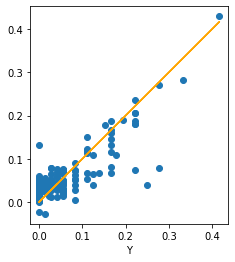

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(, test_pYredictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict90.csv", prediction, delimiter=",")

[[ 0.04533041]
 [ 0.02141406]
 [ 0.0654847 ]
 [ 0.03774963]
 [ 0.03498003]
 [ 0.02985543]
 [ 0.0495291 ]
 [ 0.05866455]
 [ 0.02862909]
 [ 0.2053789 ]
 [ 0.11403702]
 [ 0.07852563]
 [-0.02185245]
 [ 0.18047458]
 [ 0.02915027]
 [ 0.02735967]
 [ 0.28125215]
 [ 0.04031117]
 [ 0.0306842 ]
 [ 0.14956948]
 [ 0.2053182 ]
 [ 0.02793143]
 [ 0.16015992]
 [ 0.04480141]
 [ 0.03837179]
 [ 0.02411992]
 [ 0.02248638]
 [ 0.05417537]
 [ 0.01017709]
 [ 0.01580456]
 [ 0.0468517 ]
 [ 0.10928065]
 [ 0.02410809]
 [ 0.01886649]
 [ 0.0486101 ]
 [ 0.04492322]
 [ 0.0893271 ]
 [ 0.01508125]
 [ 0.02366882]
 [ 0.07780568]
 [ 0.16631609]
 [ 0.04163215]
 [ 0.01253293]
 [ 0.01530358]
 [ 0.02473073]
 [ 0.10892062]
 [ 0.02123373]
 [ 0.05670387]
 [ 0.04895429]
 [ 0.02765857]
 [ 0.05278462]
 [ 0.07707457]
 [ 0.42980954]
 [ 0.11631952]
 [ 0.07159649]
 [ 0.03416077]
 [ 0.00215048]
 [ 0.06650187]
 [ 0.02485181]
 [ 0.05161443]
 [ 0.08129392]
 [ 0.02400452]
 [ 0.02646802]
 [ 0.05290887]
 [ 0.00840581]
 [ 0.05410819]
 [ 0.00368

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Redes-Neuronales-para-estimar-Datos-de-Roc-o-con-TF-Keras-/main/Testeo%20con%2010.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,0:5]
Ytest=dataset2[:,5]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.12137834647361409


-2.5115953000349145

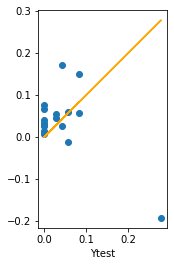

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')
plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

np.savetxt("predict10.csv", predict, delimiter=",")

[[ 0.14979216]
 [-0.19291356]
 [ 0.02769347]
 [-0.01190819]
 [ 0.02892749]
 [ 0.00787816]
 [ 0.04033856]
 [ 0.02598039]
 [ 0.05904741]
 [ 0.0568467 ]
 [ 0.01519317]
 [ 0.17212722]
 [ 0.04423407]
 [ 0.03359778]
 [ 0.06663923]
 [ 0.07590495]
 [ 0.02552199]
 [ 0.05378653]]
